In [1]:
from libraries.ewt_transform import EWT1D 
from libraries.helpers import findFibrets, getLowFreqComponent
import numpy as np 
import yfinance as yf 
import matplotlib.pyplot as plt 
import pandas as pd 

import plotly.offline as py
py.init_notebook_mode(connected=True)

import plotly.graph_objects as go 

In [2]:
data = yf.download("SPY", "2015-01-01", "2020-01-01")

fig = go.Figure(data = [
        go.Candlestick(x = data.index, 
        open = data["Open"], high = data["High"],
        low = data["Low"], close = data["Close"])
    ])

# fig.update_layout(xaxis_rangeslider_visible=False, title_text="SPY Stock data")
fig.update_layout(title_text="SPY Stock data", title_x = 0.5)
fig.show()

[*********************100%***********************]  1 of 1 completed


In [3]:
close = list(data["Close"])
close[:10]


[205.5399932861328,
 205.42999267578125,
 201.72000122070312,
 199.82000732421875,
 202.30999755859375,
 205.89999389648438,
 204.25,
 202.64999389648438,
 202.0800018310547,
 200.86000061035156]

In [4]:
def getRetracements(window):

    rets = []
    m = max(window) 
    window = [w/m for w in window] 
    d_window = [window[i+1] - window[i] for i in range(len(window) - 1)]

    for idx in range(len(d_window) - 1):
        if d_window[idx] < 0 and d_window[idx+1] >= 0:
            rets.append(window[idx]*m)
        elif d_window[idx] >= 0 and d_window[idx+1] < 0:
            rets.append(window[idx]*m)

    return rets, d_window

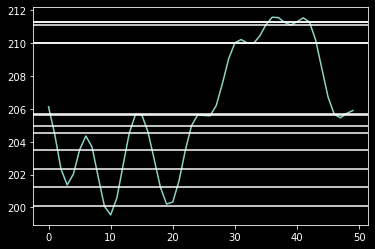

In [34]:
sample = getLowFreqComponent(close[:50], order=2, n=6)
plt.plot(sample)

inflections, d_sample = getRetracements(sample)
# plt.plot(d_sample)
for i in inflections:
    plt.axhline(i)

plt.show()

In [35]:
inflections

[202.35094326449058,
 203.50689174908968,
 200.07681695085495,
 204.53381194494324,
 201.24535339230735,
 204.9655362861366,
 205.603902087772,
 210.02664255858832,
 210.0181457116481,
 211.12696822724556,
 211.26824371300086,
 211.3053571198938,
 205.670521603903]

In [36]:
from sklearn.cluster import KMeans

inp = inflections.copy()
inp = np.expand_dims(inp, -1)
kmeans = KMeans(5)
kmeans.fit(inp)

clustered_inf = kmeans.predict(inp)
print(clustered_inf)

[1 1 2 3 2 3 3 4 4 0 0 0 3]


In [37]:
avg_inf = kmeans.cluster_centers_[:,0]

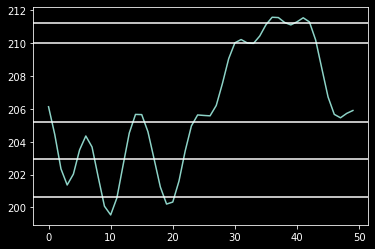

In [38]:
plt.plot(sample)
for i in avg_inf:
    plt.axhline(i)

plt.show()